# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [69]:
df = pd.read_csv("data2/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [125]:
type(df)

pandas.core.frame.DataFrame

In [127]:
df.head(10)

,國文,英文,數學,自然,社會,總級分
0,9,10,15,10,13,57
1,10,10,10,8,9,47
2,13,15,8,11,14,61
3,10,10,8,9,14,51
4,13,12,14,12,13,64
5,13,12,12,12,8,57
6,11,13,10,10,14,58
7,8,9,10,10,8,45
8,9,9,12,10,10,50
9,10,15,12,11,9,57


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [129]:
df["國文"]

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [131]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<Axes: >

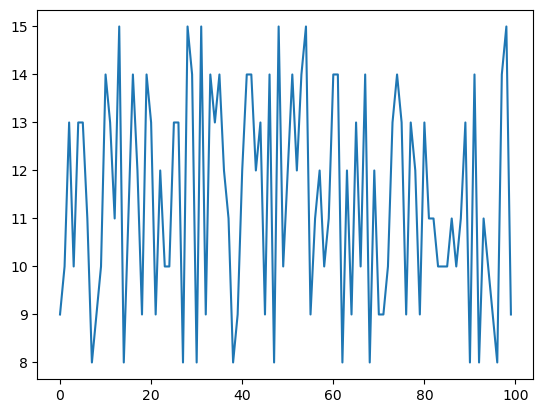

In [133]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<Axes: >

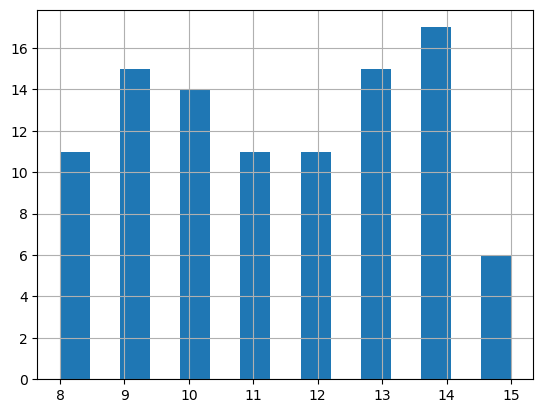

In [135]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [137]:
df.國文.mean()

11.39

算標準差。

In [139]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

In [141]:
df.describe()

,國文,英文,數學,自然,社會,總級分
count,100.000000,100.000000,100.000000,100.00000,100.00000,100.0000
mean,11.390000,11.380000,11.570000,11.03000,11.83000,57.2000
std,2.196853,2.273164,2.310516,2.21772,2.48655,4.8053
min,8.000000,8.000000,8.000000,8.00000,8.00000,45.0000
25%,9.000000,9.000000,10.000000,9.00000,9.00000,54.7500
50%,11.000000,11.000000,11.000000,11.00000,12.00000,57.0000
75%,13.000000,13.000000,14.000000,13.00000,14.00000,60.0000
max,15.000000,15.000000,15.000000,15.00000,15.00000,66.0000


有時我們很愛看的相關係數矩陣。

In [143]:
df.corr()

,國文,英文,數學,自然,社會,總級分
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421,0.317865
英文,0.160158,1.000000,0.025656,0.113929,-0.063512,0.578324
數學,-0.310899,0.025656,1.000000,0.014371,0.041651,0.379013
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594,0.390891
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000,0.422178
總級分,0.317865,0.578324,0.379013,0.390891,0.422178,1.000000


只算兩科間的相關係數當然也可以。

In [145]:
df.國文.corr(df.數學)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [241]:
df["總級分"] = df.sum(axis=1)
df.head(10)

,國文,英文,數學,自然,社會,加權,總級分
0,9,10,15,10,13,49,212
1,10,10,10,8,9,40,174
2,13,15,8,11,14,44,210
3,10,10,8,9,14,36,174
4,13,12,14,12,13,53,234
5,13,12,12,12,8,49,212
6,11,13,10,10,14,44,204
7,8,9,10,10,8,37,164
8,9,9,12,10,10,42,184
9,10,15,12,11,9,49,212


### 【技巧】

有計算的當然也可以的。

In [243]:
df['加權'] = df.國文+df.英文+df.數學*2

In [245]:
df.head()

,國文,英文,數學,自然,社會,加權,總級分
0,9,10,15,10,13,49,212
1,10,10,10,8,9,40,174
2,13,15,8,11,14,44,210
3,10,10,8,9,14,36,174
4,13,12,14,12,13,53,234


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [247]:
df.sort_values(by = "總級分", ascending=False).head(10)

,國文,英文,數學,自然,社會,加權,總級分
57,12,15,14,13,11,55,240
25,13,13,14,13,12,54,238
83,10,14,15,13,13,54,238
36,12,13,15,10,14,55,238
37,11,12,15,13,14,53,236
48,15,14,12,9,15,53,236
80,13,15,12,13,13,52,236
73,13,15,15,8,8,58,234
4,13,12,14,12,13,53,234
87,10,13,14,13,15,51,232


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [249]:
df2 = df.sort_values(by =["加權","總級分"],ascending=False)
df2

,國文,英文,數學,自然,社會,加權,總級分
73,13,15,15,8,8,58,234
57,12,15,14,13,11,55,240
36,12,13,15,10,14,55,238
25,13,13,14,13,12,54,238
83,10,14,15,13,13,54,238
...,...,...,...,...,...,...,...
3,10,10,8,9,14,36,174
84,10,8,9,9,15,36,174
32,9,11,8,8,11,36,166
18,9,8,8,8,12,33,156


### 【重點】重設 index

In [251]:
df2.index = range(1,101)
df2.head()

,國文,英文,數學,自然,社會,加權,總級分
1,13,15,15,8,8,58,234
2,12,15,14,13,11,55,240
3,12,13,15,10,14,55,238
4,13,13,14,13,12,54,238
5,10,14,15,13,13,54,238


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [253]:
df2[df2.數學 == 15]

,國文,英文,數學,自然,社會,加權,總級分
1,13,15,15,8,8,58,234
3,12,13,15,10,14,55,238
5,10,14,15,13,13,54,238
7,11,12,15,13,14,53,236
10,14,9,15,10,14,53,230
13,10,12,15,10,14,52,226
15,9,13,15,8,14,52,222
18,9,12,15,13,12,51,224
21,10,11,15,12,8,51,214
22,11,10,15,10,8,51,210


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [255]:
df2[(df2.數學 == 15) & (df2.英文 == 15)]

,國文,英文,數學,自然,社會,加權,總級分
1,13,15,15,8,8,58,234


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [257]:
df2.drop("總級分",axis = 1)
df2

,國文,英文,數學,自然,社會,加權,總級分
1,13,15,15,8,8,58,234
2,12,15,14,13,11,55,240
3,12,13,15,10,14,55,238
4,13,13,14,13,12,54,238
5,10,14,15,13,13,54,238
...,...,...,...,...,...,...,...
96,10,10,8,9,14,36,174
97,10,8,9,9,15,36,174
98,9,11,8,8,11,36,166
99,9,8,8,8,12,33,156


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [ ]:
df2.drop("總級分",axis = 1,inplace=True)
df2

### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [259]:
df2.drop(5).head()

,國文,英文,數學,自然,社會,加權,總級分
1,13,15,15,8,8,58,234
2,12,15,14,13,11,55,240
3,12,13,15,10,14,55,238
4,13,13,14,13,12,54,238
6,13,13,14,8,13,54,230


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [54]:
df2.drop(df2.姓名=="李士賢"])
df

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


In [55]:
df2.drop(df2.姓名=="李士賢"].index)
df

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [286]:
!pip install pandas_datareader

In [287]:
!pip install yfinance

In [290]:
import yfinance as yf

df = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
print(df.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620850  72.681296  71.373226  71.627100  135480400
2020-01-03  71.914825  72.676454  71.689965  71.847125  146322800
2020-01-06  72.487854  72.526541  70.783256  71.034717  118387200
2020-01-07  72.146942  72.753823  71.926915  72.497529  108872000
2020-01-08  73.307510  73.609745  71.849533  71.849533  132079200


In [2]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [292]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620850,72.681296,71.373226,71.627100,135480400
2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


#### 只要最後 300 個交易日!

In [302]:
df = df[-300:]
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-10-20,141.321930,143.785873,140.592597,140.957271,64522000
2022-10-21,145.145920,145.717556,140.592544,140.809372,86548600
2022-10-24,147.294510,148.063259,143.894272,145.067111,75981900
2022-10-25,150.142822,150.290668,147.205807,147.925274,74732300
2022-10-26,147.195953,149.797876,145.904835,148.782733,88194300
...,...,...,...,...,...
2023-12-22,192.192551,193.989390,191.567126,193.761051,37122800
2023-12-26,191.646561,192.480450,191.428159,192.202487,28919300


#### 20 日的移動平均

<Axes: xlabel='Date'>

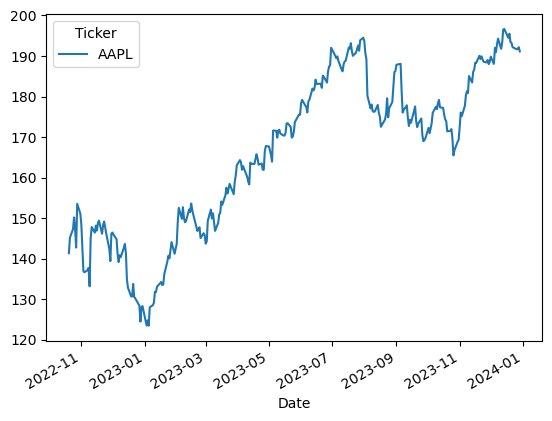

In [306]:
df.Close.plot()

<Axes: xlabel='Date'>

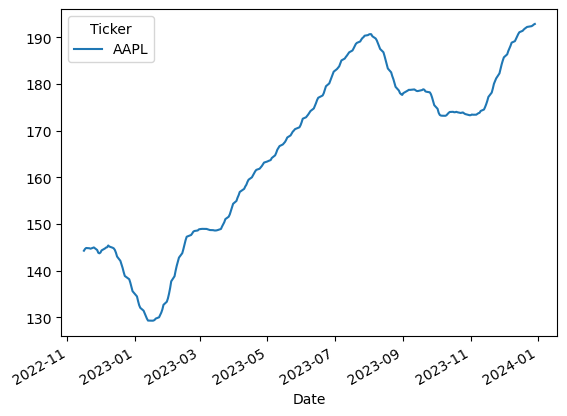

In [318]:
df.Close.rolling(20).mean(0).plot()

#### 20 日和 60 日的移動平均

<Axes: xlabel='Date'>

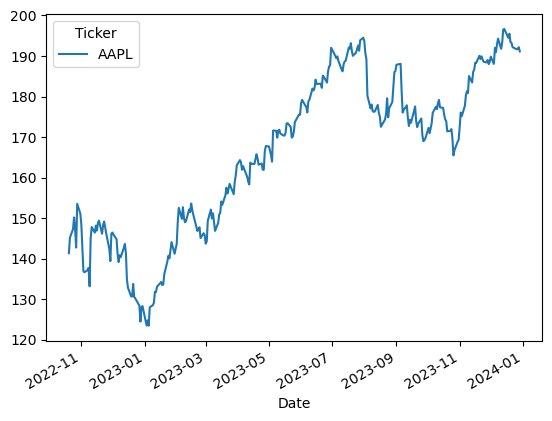

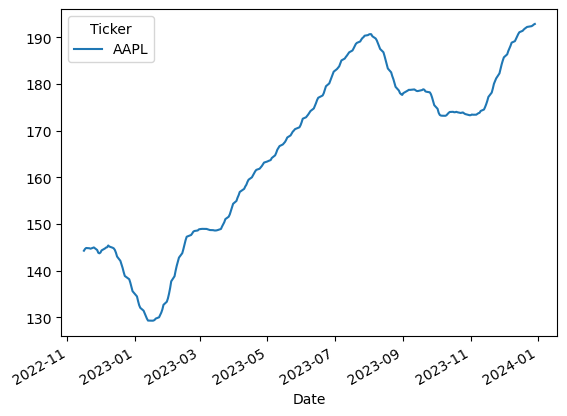

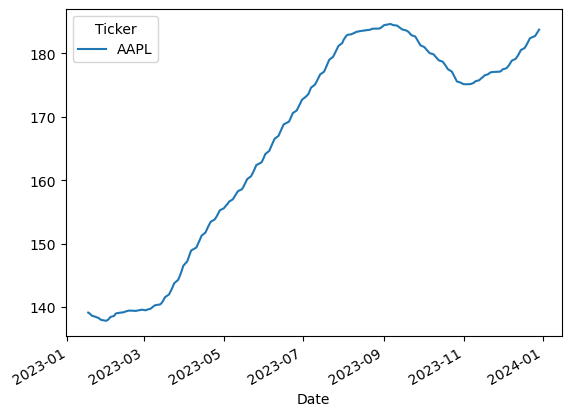

In [320]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [324]:
close = df.Close.values
len(close)

300

In [328]:
x = close[:-1]
len(x)

299

In [330]:
y = close[1:]
len(y)

299

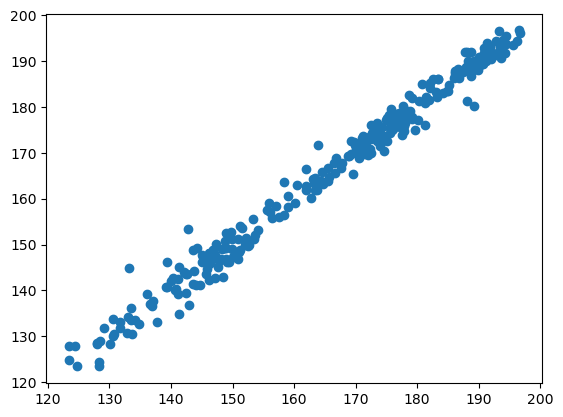

In [332]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [334]:
mydata = np.random.randn(4,3)

In [336]:
mydata 

array([[-1.15515783, -0.04090393,  0.85117265],
       [-0.10345121,  0.35273283, -2.22764903],
       [ 0.16062617, -0.83662708, -0.8934126 ],
       [-0.84236995, -1.63035946, -2.21615122]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [338]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [340]:
df2

,A,B,C
0,-1.155158,-0.040904,0.851173
1,-0.103451,0.352733,-2.227649
2,0.160626,-0.836627,-0.893413
3,-0.842370,-1.630359,-2.216151


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [344]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [346]:
df3

,A,B,C
0,0.020197,-0.178619,0.798506
1,-1.486367,-1.609002,1.887773
2,-0.635378,0.170238,1.445144


In [350]:
df4 = pd.concat([df2,df3])

In [352]:
df4

,A,B,C
0,-1.155158,-0.040904,0.851173
1,-0.103451,0.352733,-2.227649
2,0.160626,-0.836627,-0.893413
3,-0.842370,-1.630359,-2.216151
0,0.020197,-0.178619,0.798506
1,-1.486367,-1.609002,1.887773
2,-0.635378,0.170238,1.445144


前面我們弄得亂七八糟的 index 重設一下。

In [354]:
df4.index = range(7)

In [356]:
df4

,A,B,C
0,-1.155158,-0.040904,0.851173
1,-0.103451,0.352733,-2.227649
2,0.160626,-0.836627,-0.893413
3,-0.842370,-1.630359,-2.216151
4,0.020197,-0.178619,0.798506
5,-1.486367,-1.609002,1.887773
6,-0.635378,0.170238,1.445144


#### 横向的貼

In [358]:
df5 = pd.concat([df2,df3],axis = 1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [360]:
df5

,A,B,C,A,B,C
0,-1.155158,-0.040904,0.851173,0.020197,-0.178619,0.798506
1,-0.103451,0.352733,-2.227649,-1.486367,-1.609002,1.887773
2,0.160626,-0.836627,-0.893413,-0.635378,0.170238,1.445144
3,-0.842370,-1.630359,-2.216151,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [366]:
df_names = pd.read_csv("data2/names.csv",names = ["姓名"])

In [368]:
df_names.head()

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [372]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                         columns=['國文','英文','數學','社會','自然'])

In [374]:
df_grades

,國文,英文,數學,社會,自然
0,12,8,12,15,7
1,12,6,11,10,11
2,14,11,8,13,7
3,7,10,14,10,6
4,14,8,13,15,9
...,...,...,...,...,...
95,11,13,7,10,13
96,9,10,8,12,6
97,14,8,15,7,11
98,6,7,14,12,8


In [376]:
df_names

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮
...,...
95,陳君生
96,曾桂甫
97,林欣怡
98,林佳霖


In [378]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                         columns=['國文','英文','數學','社會','自然'])

In [384]:
df_grades.to_csv("data2/grades2_csv")
df_grades

,國文,英文,數學,社會,自然
0,10,8,10,12,8
1,14,6,10,7,8
2,11,8,9,15,8
3,14,9,11,8,10
4,14,11,11,11,7
...,...,...,...,...,...
95,6,15,7,11,7
96,14,12,14,10,15
97,6,12,10,9,8
98,15,12,12,7,9


In [386]:
df_x = pd.concat([df_names,df_grades],axis = 1)

In [388]:
df_x

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,10,8,10,12,8
1,王紹尹,14,6,10,7,8
2,黃季坤,11,8,9,15,8
3,許正書,14,9,11,8,10
4,張鈞蓮,14,11,11,11,7
...,...,...,...,...,...,...
95,陳君生,6,15,7,11,7
96,曾桂甫,14,12,14,10,15
97,林欣怡,6,12,10,9,8
98,林佳霖,15,12,12,7,9
